# Matplotlib Basics

---

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## Generate test data using `NumPy`

Here, we generate some test data to use for experimenting with plotting:

In [3]:
n = 120
temps = np.random.randint(10, 30, n)
temps2 = np.random.randint(13, 30, n)
times = np.arange(n)

## Figure and Axes

Now, let's make our first plot with Matplotlib. Matplotlib has two core objects: the `Figure` and the `Axes`. The `Axes` object is an individual plot, containing an x-axis, a y-axis, labels, etc.; it also contains all of the various methods we might use for plotting. A `Figure` contains one or more `Axes` objects; it also contains methods for saving plots to files (e.g., PNG, SVG), among other similar high-level functionality.  You may find the following diagram helpful:

![anatomy of a figure](https://matplotlib.org/stable/_images/sphx_glr_anatomy_001.png "anatomy of a figure")

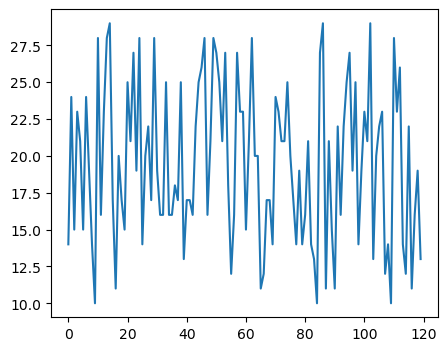

In [3]:
plt.figure(figsize=(5, 4))
plt.plot(times, temps)

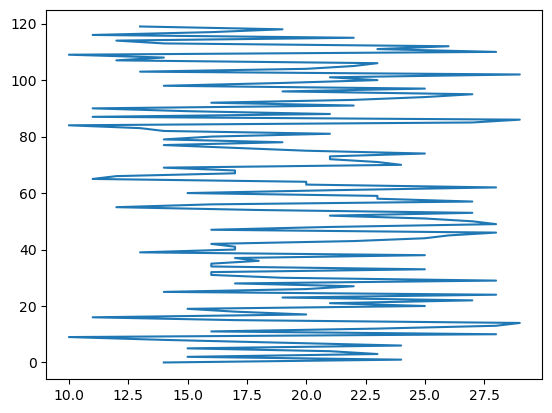

In [4]:
plt.plot(temps, times)

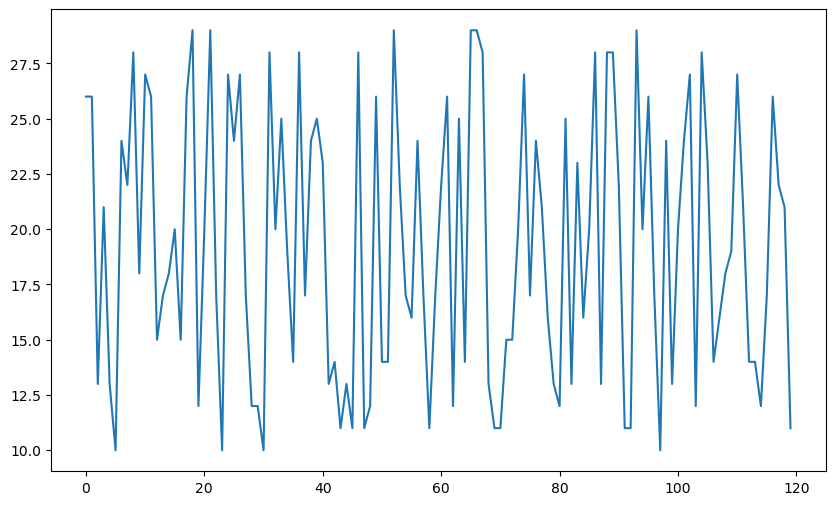

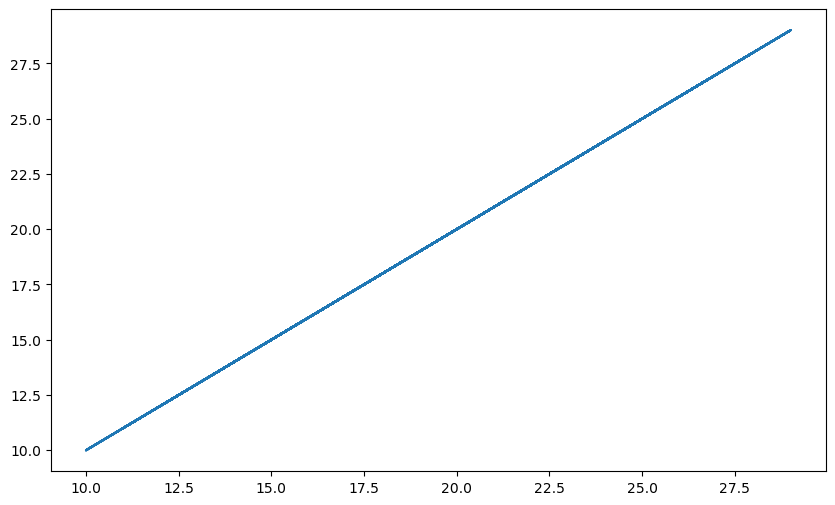

In [10]:
# Create a figure
fig = plt.figure(figsize=(10, 6))

# Ask, out of a 1x1 grid of plots, the first axes.
ax = fig.add_subplot(1, 1, 1)

# Plot times as x-variable and temperatures as y-variable
ax.plot(times, temps);

fig2 = plt.figure(figsize=(10, 6))

# Ask, out of a 1x1 grid of plots, the first axes.
ax2 = fig2.add_subplot(1, 1, 1)

# Plot times as x-variable and temperatures as y-variable
ax2.plot(temps, temps);

### Adding labels to an `Axes` object

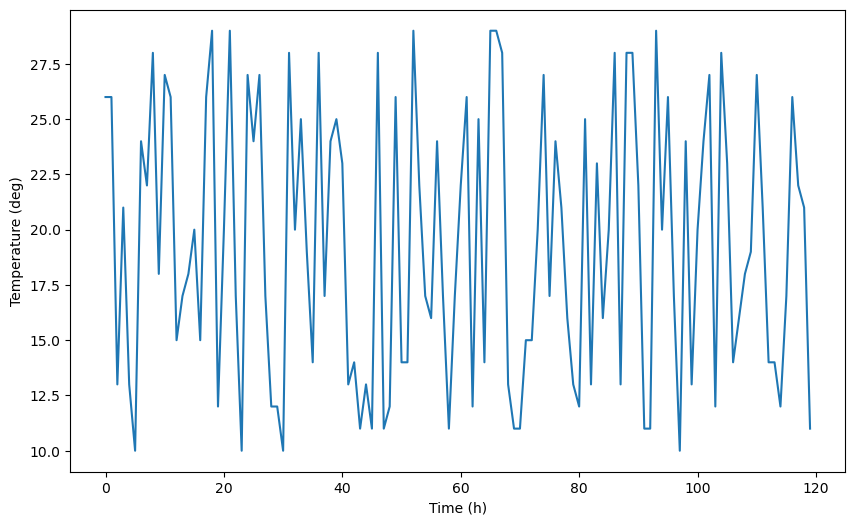

In [11]:
# Add some labels to the plot
ax.set_xlabel('Time (h)')
ax.set_ylabel('Temperature (deg)')

# Prompt the notebook to re-display the figure after we modify it
fig

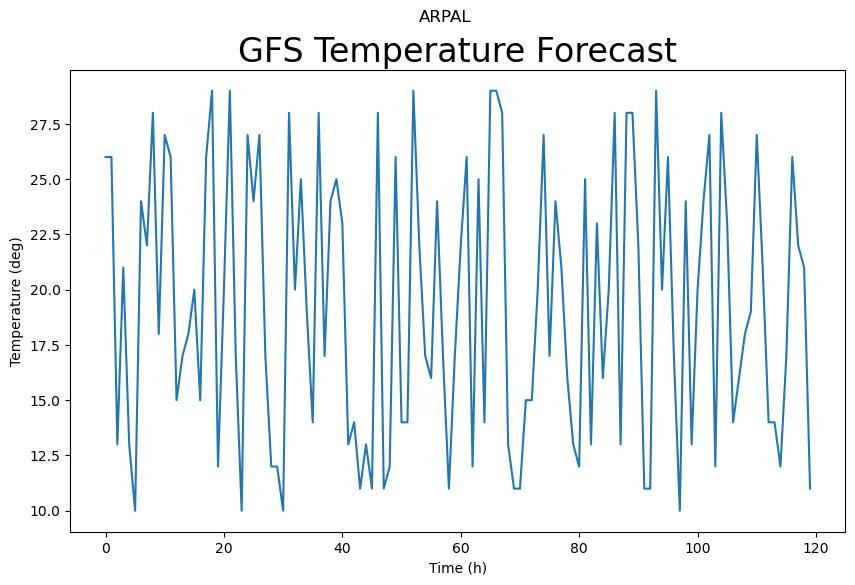

In [15]:
ax.set_title('GFS Temperature Forecast', size=24)
fig.suptitle('ARPAL')

fig

### Adding labels and legend

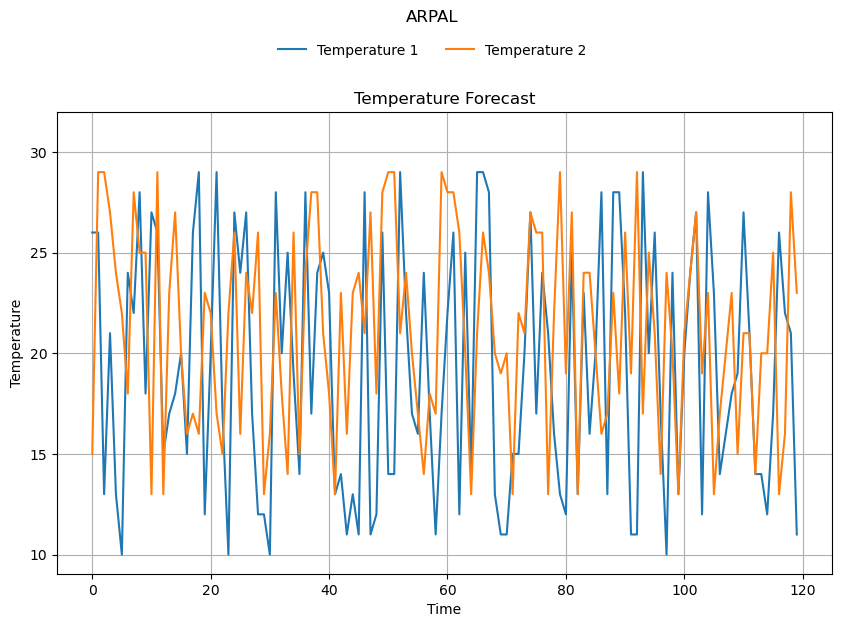

In [26]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)

# Plot two series of data
# The label argument is used when generating a legend.
ax.plot(times, temps, label='Temperature 1')
ax.plot(times, temps2, label='Temperature 2')

# Add labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Temperature')
ax.set_title('Temperature Forecast')
ax.set_ylim(top=np.max([temps.max(), temps2.max()])+3)

# Add gridlines
ax.grid(True)

# Add a legend to the upper left corner of the plot
#ax.legend(loc='upper left')
lines, labels=ax.get_legend_handles_labels()
fig.legend(lines, labels, bbox_to_anchor=(0.5, 0.95), loc='lower center', frameon=False, ncol=2);
fig.suptitle('ARPAL', y=1.05);

## Customizing 

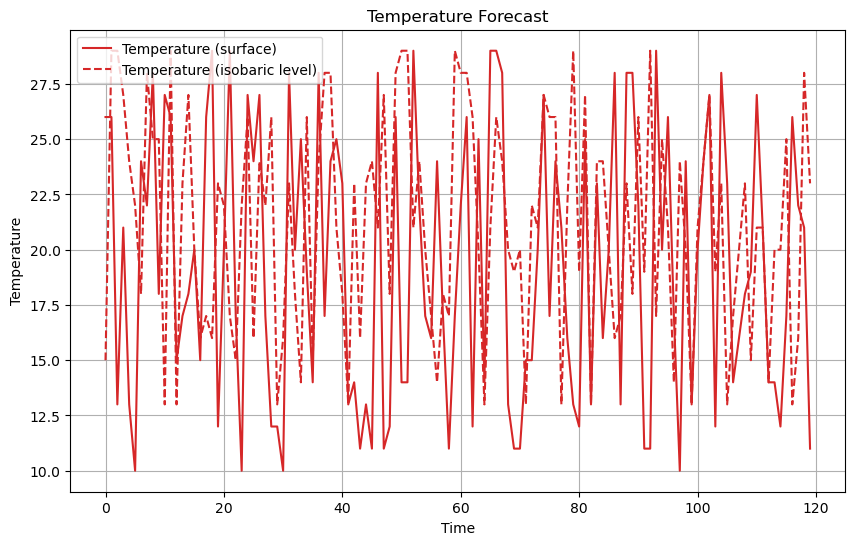

In [27]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)

# Specify how our lines should look
ax.plot(times, temps, color='tab:red', label='Temperature (surface)')
ax.plot(
    times,
    temps2,
    color='tab:red',
    linestyle='--',
    label='Temperature (isobaric level)',
)

# Set the labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Temperature')
ax.set_title('Temperature Forecast')

# Add the grid
ax.grid(True)

# Add a legend to the upper left corner of the plot
ax.legend(loc='upper left');

### Using add_subplot to create two different subplots within the figure
We can use the `.add_subplot()` method to add subplots to our figure! This method takes the arguments `(rows, columns, subplot_number)`.

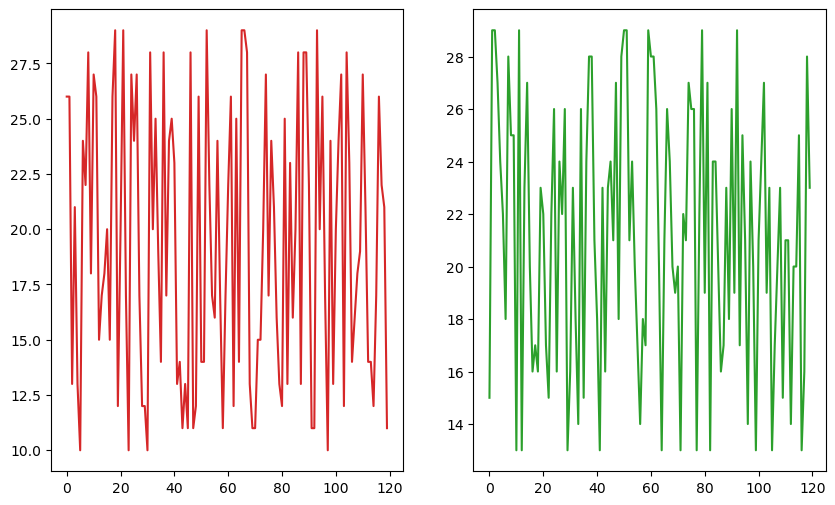

In [28]:
fig = plt.figure(figsize=(10, 6))

# Create a plot for temperature
ax = fig.add_subplot(1, 2, 1)
ax.plot(times, temps, color='tab:red')

# Create a plot for dewpoint
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(times, temps2, color='tab:green');

You can also call `plot.subplots()` with the keyword arguments `nrows` (number of rows) and `ncols` (number of columns).  This initializes a new `Axes` object, called `ax`, with the specified number of rows and columns.  This object also contains a 1-D list of subplots, with a size equal to `nrows` x `ncols`.

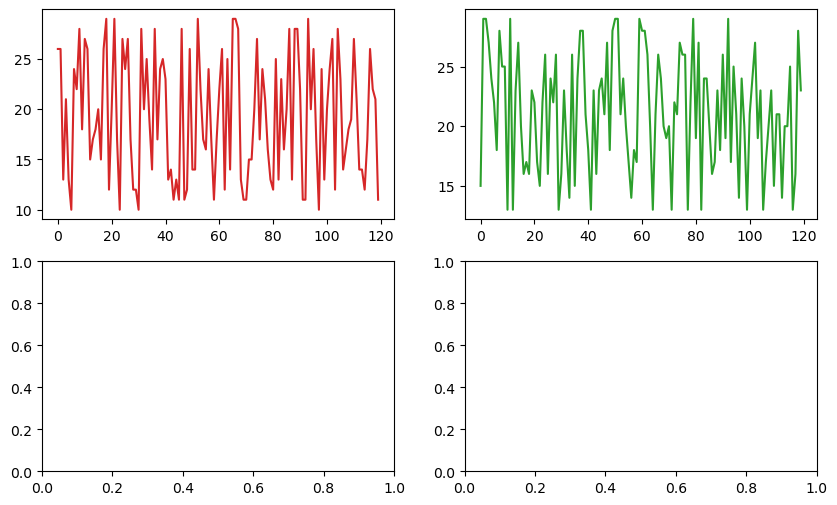

In [31]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
fig.axes
ax[0,0].plot(times, temps, color='tab:red')
ax[0,1].plot(times, temps2, color='tab:green');

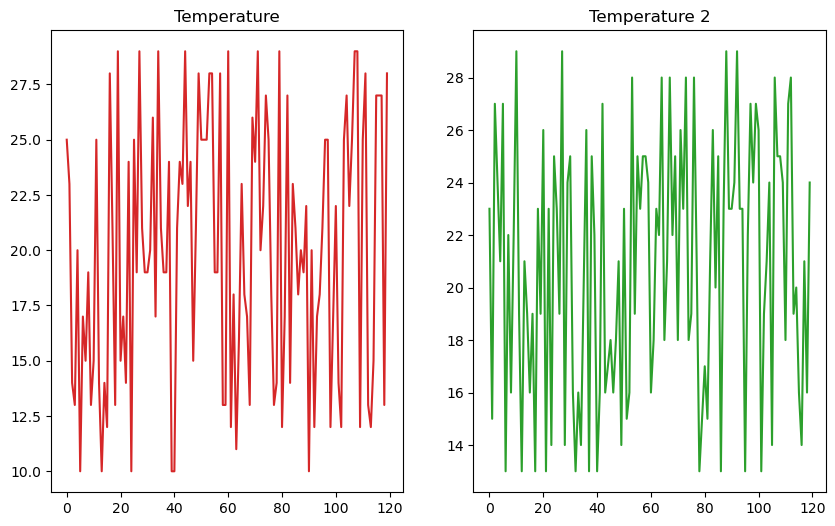

In [15]:
fig = plt.figure(figsize=(10, 6))

# Create a plot for temperature
ax = fig.add_subplot(1, 2, 1)
ax.plot(times, temps, color='tab:red')
ax.set_title('Temperature')

# Create a plot for dewpoint
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(times, temps2, color='tab:green')
ax2.set_title('Temperature 2');

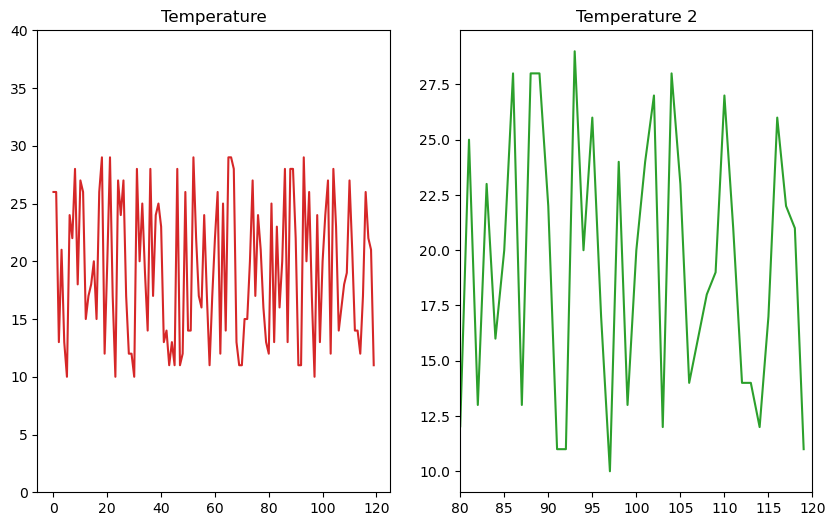

In [33]:
fig = plt.figure(figsize=(10, 6))

# Create a plot for temperature
ax = fig.add_subplot(1, 2, 1)
ax.plot(times, temps, color='tab:red')
ax.set_title('Temperature')
ax.set_xlim(None, None)
ax.set_ylim(0, 40)

# Create a plot for dewpoint
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(times, temps, color='tab:green')
ax2.set_title('Temperature 2')
ax2.set_xlim(80, 120);

### Using `sharex` and `sharey` to share plot limits

You may want to have both subplots share the same x/y axis limits.  When setting up a new `Axes` object through a method like `add_subplot`, specify the keyword arguments `sharex=ax` and `sharey=ax`, where `ax` is the `Axes` object with which to share axis limits.

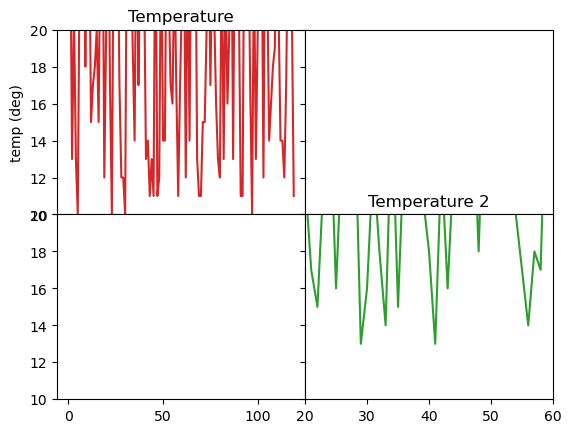

In [36]:
fig, axs = plt.subplots(2,2,sharex='col', sharey=True)

# Create a plot for temperature
ax = axs[0,0]
ax.plot(times, temps, color='tab:red')
ax.set_title('Temperature')
ax.set_ylim(10, 20)
ax.set_ylabel('temp (deg)')

# Create a plot for dewpoint
ax2 = axs[1,1]
ax2.plot(times, temps2, color='tab:green')
ax2.set_title('Temperature 2');
ax2.set_xlim(20,60)

fig.subplots_adjust(hspace=0,wspace=0)

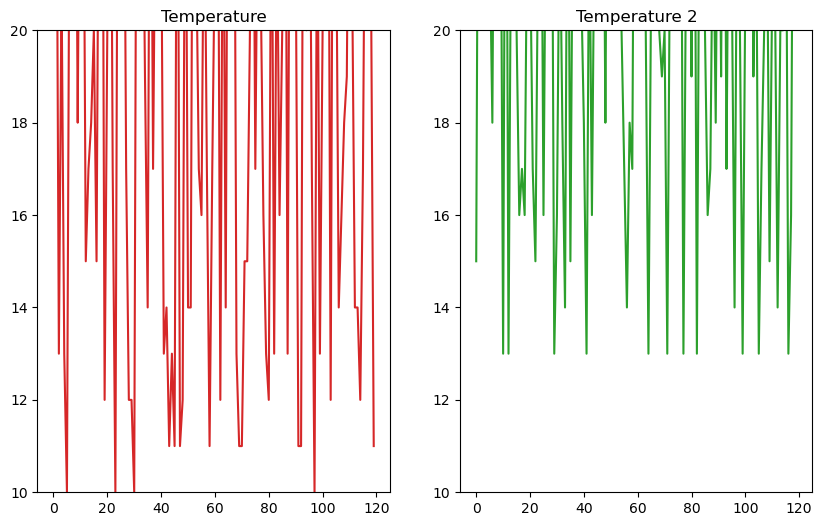

In [34]:
fig = plt.figure(figsize=(10, 6))

# Create a plot for temperature
ax = fig.add_subplot(1, 2, 1)
ax.plot(times, temps, color='tab:red')
ax.set_title('Temperature')
ax.set_ylim(10, 20)

# Create a plot for dewpoint
ax2 = fig.add_subplot(1, 2, 2, sharex=ax, sharey=ax)
ax2.plot(times, temps2, color='tab:green')
ax2.set_title('Temperature 2');

### Putting this all together

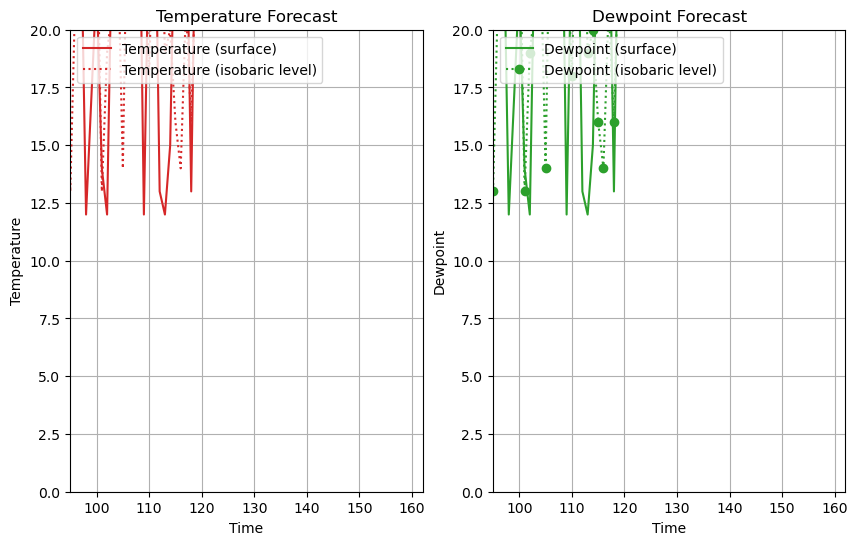

In [31]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 2, 1)

# Specify how our lines should look
ax.plot(times, temps, color='tab:red', label='Temperature (surface)')
ax.plot(
    times,
    temps2,
    color='tab:red',
    linestyle=':',
    label='Temperature (isobaric level)',
)

# Add labels, grid, and legend
ax.set_xlabel('Time')
ax.set_ylabel('Temperature')
ax.set_title('Temperature Forecast')
ax.grid(True)
ax.legend(loc='upper left')
ax.set_ylim(0, 20)
ax.set_xlim(95, 162)


# Add our second plot - for dewpoint, changing the colors and labels
ax2 = fig.add_subplot(1, 2, 2, sharex=ax, sharey=ax)
ax2.plot(times, temps, color='tab:green', label='Dewpoint (surface)')
ax2.plot(
    times,
    temps2,
    color='tab:green',
    linestyle=':',
    marker='o',
    label='Dewpoint (isobaric level)',
)

ax2.set_xlabel('Time')
ax2.set_ylabel('Dewpoint')
ax2.set_title('Dewpoint Forecast')
ax2.grid(True)
ax2.legend(loc='upper left');

## Displaying Images

`imshow` displays the values in an array as colored pixels, similar to a heat map.

Here, we declare some fake data in a bivariate normal distribution, to illustrate the `imshow` method:

In [37]:
x = y = np.arange(-3.0, 3.0, 0.025)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-(X**2) - Y**2)
Z2 = np.exp(-((X - 1) ** 2) - (Y - 1) ** 2)
Z = (Z1 - Z2) * 2

We can now pass this fake data to `imshow` to create a heat map of the distribution:

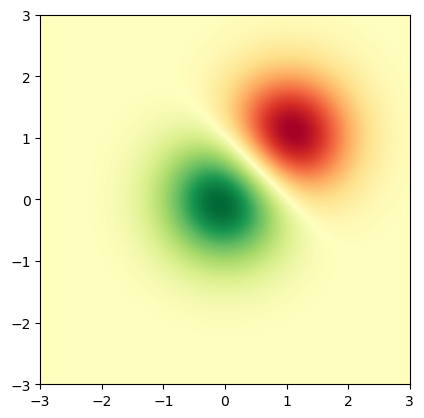

In [38]:
fig, ax = plt.subplots()
im = ax.imshow(
    Z, interpolation='bilinear', cmap='RdYlGn', origin='lower', extent=[-3, 3, -3, 3]
)

## Contour and Filled Contour Plots

- `contour` creates contours around data.
- `contourf` creates filled contours around data.

Let's start with the `contour` method, which, as just mentioned, creates contours around data:

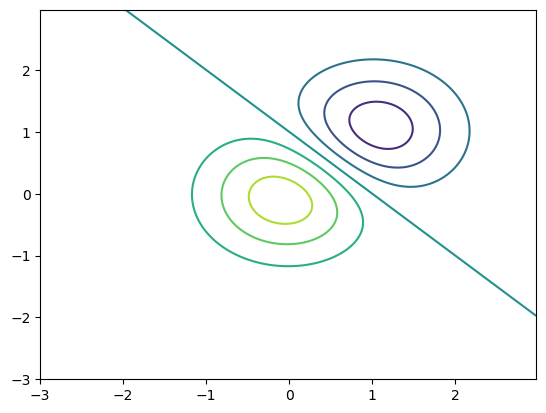

In [39]:
fig, ax = plt.subplots()
ax.contour(X, Y, Z);

After creating contours, we can label the lines using the `clabel` method, like this:

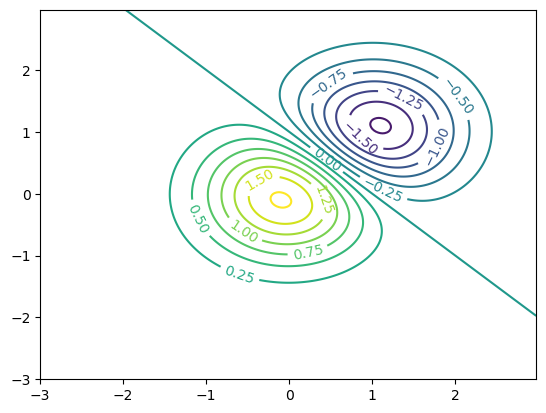

In [28]:
fig, ax = plt.subplots()
c = ax.contour(X, Y, Z, levels=np.arange(-2, 2, 0.25))
ax.clabel(c);

As described above, the `contourf` (contour fill) method creates filled contours around data, like this:

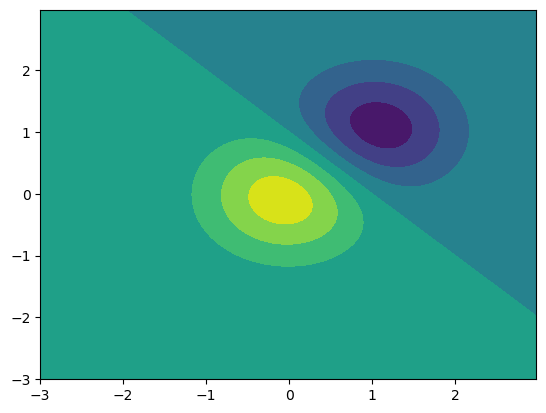

In [29]:
fig, ax = plt.subplots()
c = ax.contourf(X, Y, Z);

As a final example, let's create a heatmap figure with contours using the `contour` and `imshow` methods.  First, we use `imshow` to create the heatmap, specifying a colormap using the `cmap` keyword argument.  We then call `contour`, specifying black contours and an interval of 0.5.  Here is the example code, and resulting figure:

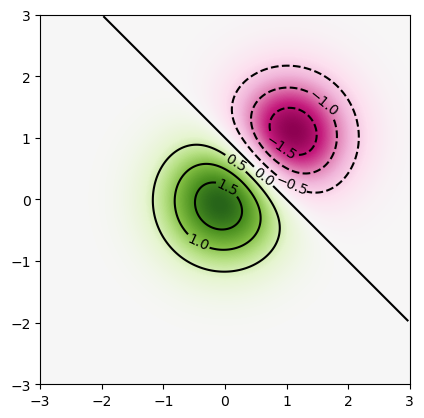

In [30]:
fig, ax = plt.subplots()
im = ax.imshow(
    Z, interpolation='bilinear', cmap='PiYG', origin='lower', extent=[-3, 3, -3, 3]
)
c = ax.contour(X, Y, Z, levels=np.arange(-2, 2, 0.5), colors='black')
ax.clabel(c);